In [ ]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.metrics import classification_report
import numpy as np


In [ ]:
# 2. Load and Preprocess CIFAR-10 Data
def load_custom_dataset():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    return (train_images, train_labels), (test_images, test_labels)

(train_images, train_labels), (test_images, test_labels) = load_custom_dataset()


In [ ]:
# 3. Define LeNet Architecture
def build_lenet(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.AveragePooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
# 4. Fine-tuning and Feature Extraction Functions
def fine_tune_lenet(base_model, num_classes):
    base_model.pop()
    base_model.add(layers.Dense(num_classes, activation='softmax'))
    return base_model

def feature_extraction(base_model):
    for layer in base_model.layers[:-1]:
        layer.trainable = False
    return base_model


In [ ]:
# 5. Train and Evaluate Function
def train_and_evaluate(model, train_data, test_data, epochs=10):
    train_images, train_labels = train_data
    test_images, test_labels = test_data

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    model.fit(train_images, train_labels, epochs=epochs, batch_size=64, verbose=2)

    predictions = np.argmax(model.predict(test_images), axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    print(classification_report(true_labels, predictions, digits=4))

    return model


In [ ]:
# Model 1: Training from Scratch
print("\nTraining model from scratch...")
lenet_scratch = build_lenet(train_images.shape[1:], train_labels.shape[1])
train_and_evaluate(lenet_scratch, (train_images, train_labels), (test_images, test_labels))


Training model from scratch...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 - 30s - 39ms/step - accuracy: 0.3805 - loss: 1.7074
Epoch 2/10
782/782 - 39s - 50ms/step - accuracy: 0.4752 - loss: 1.4616
Epoch 3/10
782/782 - 26s - 33ms/step - accuracy: 0.5155 - loss: 1.3570
Epoch 4/10
782/782 - 41s - 53ms/step - accuracy: 0.5397 - loss: 1.2894
Epoch 5/10
782/782 - 26s - 33ms/step - accuracy: 0.5593 - loss: 1.2324
Epoch 6/10
782/782 - 41s - 53ms/step - accuracy: 0.5797 - loss: 1.1834
Epoch 7/10
782/782 - 42s - 53ms/step - accuracy: 0.5930 - loss: 1.1459
Epoch 8/10
782/782 - 40s - 51ms/step - accuracy: 0.6069 - loss: 1.1093
Epoch 9/10
782/782 - 42s - 53ms/step - accuracy: 0.6185 - loss: 1.0736
Epoch 10/10
782/782 - 40s - 52ms/step - accuracy: 0.6315 - loss: 1.0405
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.6110    0.7320    0.6661      1000
           1     0.6587    0.7430    0.6983      1000
           2     0.5924    0.3270    0.4214      1000
        

<Sequential name=sequential, built=True>


Fine-tuning pre-trained LeNet model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 - 34s - 43ms/step - accuracy: 0.3618 - loss: 1.7414
Epoch 2/10
782/782 - 40s - 52ms/step - accuracy: 0.4707 - loss: 1.4679
Epoch 3/10
782/782 - 31s - 40ms/step - accuracy: 0.5123 - loss: 1.3662
Epoch 4/10
782/782 - 27s - 34ms/step - accuracy: 0.5422 - loss: 1.2870
Epoch 5/10
782/782 - 41s - 52ms/step - accuracy: 0.5647 - loss: 1.2232
Epoch 6/10
782/782 - 26s - 34ms/step - accuracy: 0.5869 - loss: 1.1654
Epoch 7/10
782/782 - 41s - 52ms/step - accuracy: 0.6050 - loss: 1.1170
Epoch 8/10
782/782 - 41s - 52ms/step - accuracy: 0.6195 - loss: 1.0787
Epoch 9/10
782/782 - 41s - 52ms/step - accuracy: 0.6332 - loss: 1.0372
Epoch 10/10
782/782 - 41s - 52ms/step - accuracy: 0.6430 - loss: 1.0065
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.6368    0.7100    0.6714      1000
           1     0.7159    0.6830    0.6991      1000
           2     0.6204    0.3840    0.4744      1000
        

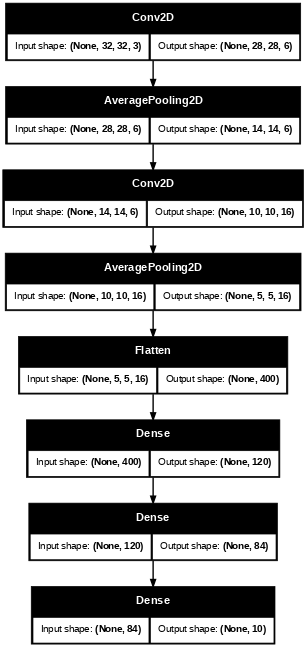

In [ ]:
# Model 2: Fine-tuning Pretrained LeNet
print("\nFine-tuning pre-trained LeNet model...")
lenet_pretrained = build_lenet(train_images.shape[1:], train_labels.shape[1])
fine_tuned_model = fine_tune_lenet(lenet_pretrained, train_labels.shape[1])
train_and_evaluate(fine_tuned_model, (train_images, train_labels), (test_images, test_labels))
plot_model(fine_tuned_model, dpi=50, show_shapes=True)

In [22]:
# Model 3: Feature Extraction
print("\nFeature extraction with pre-trained LeNet...")
lenet_feature_extraction = build_lenet(train_images.shape[1:], train_labels.shape[1])
feature_extracted_model = feature_extraction(lenet_feature_extraction)
train_and_evaluate(feature_extracted_model, (train_images, train_labels), (test_images, test_labels))


Feature extraction with pre-trained LeNet...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 850 (3.32 KB)

 Non-trainable params: 61,156 (238.89 KB)

Epoch 1/10
782/782 - 13s - 17ms/step - accuracy: 0.1772 - loss: 2.2455
Epoch 2/10
782/782 - 11s - 14ms/step - accuracy: 0.2448 - loss: 2.1717
Epoch 3/10
782/782 - 20s - 25ms/step - accuracy: 0.2691 - loss: 2.1235
Epoch 4/10
782/782 - 25s - 32ms/step - accuracy: 0.2816 - loss: 2.0893
Epoch 5/10
782/782 - 16s - 21ms/step - accuracy: 0.2878 - loss: 2.0637
Epoch 6/10
782/782 - 20s - 25ms/step - accuracy: 0.2940 - loss: 2.0435
Epoch 7/10
782/782 - 21s - 27ms/step - accuracy: 0.2971 - loss: 2.0274
Epoch 8/10
782/782 - 11s - 14ms/step - accuracy: 0.3014 - loss: 2.0143
Epoch 9/10
782/782 - 11s - 14ms/step - accuracy: 0.3031 - loss: 2.0033
Epoch 10/10
782/782 - 12s - 15ms/step - accuracy: 0.3068 - loss: 1.9939
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.3792    0.3830    0.3811      1000
           1     0.3762    0.2840    0.3236      1000
           2     0.2535    0.2170    0.2338      1000
        

<Sequential name=sequential_2, built=True>